# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Файл содержит данные  о 23699 объектах, каждый объект  описывается 22 признаками.  Некоторые признаки содержат пропущенные значения, которые необходимо обработать.

### Предобработка данных

Рассмотрим параметр ceiling_height, параметр содержит аномальные значения, но пока оставим их как есть.
Обработаем пропуски. Сделаем  замену на медиану для пропущенных значений.

In [4]:
data['ceiling_height'].unique()
data['ceiling_height'].describe()
height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(height_median)
data['ceiling_height'].isna().value_counts() # количество пропущенных значений после замены

False    23699
Name: ceiling_height, dtype: int64

Рассмотрим параметр floors_total, параметр не содержит  аномальных значений. Обработать пропуски не представляется возможным.
Отсутсвуем менее 0.4% процентов данных, удалим строки с пропусками.

In [5]:
data['floors_total'].unique()
print(data['floors_total'].isna().value_counts())
data.dropna(subset=['floors_total'], inplace=True)

False    23613
True        86
Name: floors_total, dtype: int64


Рассмотрим параметр balcony. Вероятно, что отсутствие числа балконов свидетельствует о том, что число балконов равно нулю. Заменим пропуски в balcony на 0 и изменим тип данных на int.

In [6]:
data['balcony'].unique() # проверим отсутсвие аномальных значений
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
data['balcony'].isna().value_counts() # количество пропущенных значений после замены

False    23613
Name: balcony, dtype: int64

Построим зависимости  жилой площади от общей площади недвижимости и площади кухни от общей площади недвижимости. 
Рассчитаем коэффициенты корреляции.

Коэффициент корреляции: 0.94


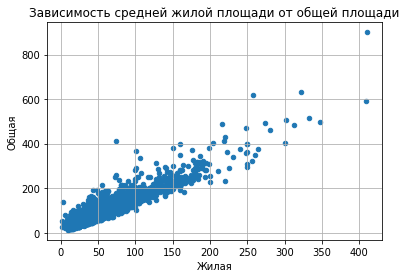

In [7]:
data.plot(x='living_area', y='total_area', kind='scatter', grid=True) 
plt.title("Зависимость средней жилой площади от общей площади")
plt.ylabel("Общая")
plt.xlabel("Жилая")
print('Коэффициент корреляции:', round(data['living_area'].corr(data['total_area']), 2))

Коэффициент корреляции: 0.61


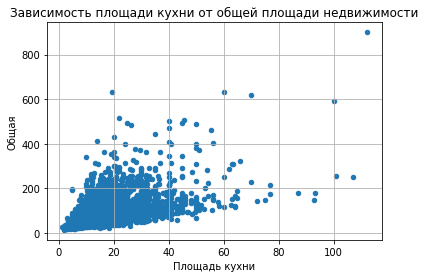

In [8]:
data.plot(x='kitchen_area', y='total_area', kind='scatter', grid=True) 
plt.title("Зависимость площади кухни от общей площади недвижимости")
plt.ylabel("Общая")
plt.xlabel("Площадь кухни")
print('Коэффициент корреляции:', round(data['kitchen_area'].corr(data['total_area']), 2))

По диаграммам рассеивания и коэффециентам корреляции видна линейная зависимость отношений. Поэтому, вычислим среднее значение доли жилой площади от общей площади, кухни от общей площади. Затем умножим эти значения на жилую площадь для каждой строки. Таким образом заполним отсутсвующие значения.

In [9]:
mean_living_area = (data['living_area'] / data['total_area']).mean()
data['living_area'] = data['living_area'].fillna(round((data['total_area'] *mean_living_area), 1))
mean_kitchen_area = (data['kitchen_area'] / data['total_area']).mean()
data['kitchen_area'] = data['kitchen_area'].fillna(round((data['total_area'] *mean_kitchen_area), 1))


Рассмотрим параметр locality_name. Пропущено 0.2% значений. Удалим строки с пропущенными значениями. Переведем строки в нижний регистр, заменим ё на е.

In [10]:
print(data['locality_name'].isna().value_counts())
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].replace('ё','e', regex=True)

False    23565
True        48
Name: locality_name, dtype: int64


Пропущенные значения в признаках is_apartment, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest  оставлены без изменений, т.к. обработать пропуски не представляется возможным. Выведем на экран признак и кол-во пропущенных значений. 

In [11]:
def nan_percent(column):
    return print('Пропущено {:.1%}'. format(data[column].isna().value_counts()[1] / len(data), 2) + ' значений в признаке', column)

nan_percent('is_apartment')
nan_percent('airports_nearest')
nan_percent('parks_around3000')
nan_percent('parks_nearest')
nan_percent('ponds_around3000')
nan_percent('ponds_nearest')

Пропущено 88.3% значений в признаке is_apartment
Пропущено 23.4% значений в признаке airports_nearest
Пропущено 23.3% значений в признаке parks_around3000
Пропущено 65.9% значений в признаке parks_nearest
Пропущено 23.3% значений в признаке ponds_around3000
Пропущено 61.7% значений в признаке ponds_nearest


In [12]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.000000
floor                   0.000000
is_apartment            0.882877
studio                  0.000000
open_plan               0.000000
kitchen_area            0.000000
balcony                 0.000000
locality_name           0.000000
airports_nearest        0.234415
cityCenters_nearest     0.233439
parks_around3000        0.233397
parks_nearest           0.659240
ponds_around3000        0.233397
ponds_nearest           0.616550
days_exposition         0.134564
dtype: float64

Заменим тип данных по дате публикации (first_day_exposition) со строчного на datetime

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Рассмотрим  парамерт days_exposition длительность размещения объявления. Заменим пропущенные значения на медиану.

In [14]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].median()
data['days_exposition'].isna().value_counts() # количество пропущенных значений после замены

False    23565
Name: days_exposition, dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу   столбец  с ценой квадратного метра

In [15]:
data['price_per_m2'] = round(data['last_price'] / data['total_area'], 1)

Добавим в таблицу день недели, месяц и год публикации объявления.

In [16]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Определим тип этажа квартиры (значения — «первый», «последний», «другой» и добавим новый столбец floor_type в таблицу.

In [17]:
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[data['floor_type'].isna(), 'floor_type'] = 'другой'

Создадим новую колонку  city_centers_km расстояние до центра города в километрах, округлим значения до целого значения.

In [18]:
data['city_centers_km'] = round(data['cityCenters_nearest'] / 1000, 0)

### Проведите исследовательский анализ данных

Рассмотрим  статистическую сводку для данных:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры;
срок продажи квартиры.
Построим диаграммы размаха для этих параметров и гистограммы.

Для  диаграммы размаха «усы» простираются влево и вправо от границ ящика на расстояние, равное
1,5 межквартильным размахам (IQR). В размах «усов» попадают нормальные
значения, а за пределами находятся выбросы. Создадим функцию возвращающаю  границы "усов" и функцию определяющую долю аномальных занчений  от выборки. Используем   близкие  к полученным значениям для построения гистограммы и диаграммы размаха

In [19]:
def mustache(column):
    stat = data[column].describe()
     # межквартирльный размах
    iqr = stat[6] - stat[4]
    # левый и правый "ус"    
    left_mustache = round(stat[4] - 1.5 * iqr, 2)
    right_mustache = round(stat[6] + 1.5 * iqr, 2)
    # левый "ус" не должен быть меньше минимального значения
    if left_mustache < stat[3]: left_mustache = stat[3] 
    # правый "ус" не должен быть больше максимального значения
    if right_mustache > stat[7]: right_mustache = stat[7]
    return [left_mustache, right_mustache]

def anomalies(column):
    return 'Выбросы составляют {:.1%}'. format(len(data.loc[data[column] > mustache(column)[1]]) / len(data)) + ' от всей выборки'

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64
[12.0, 114.25]


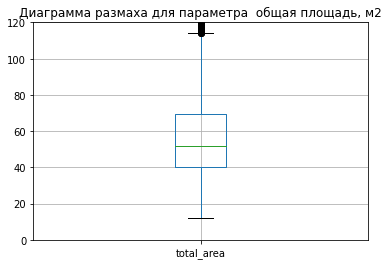

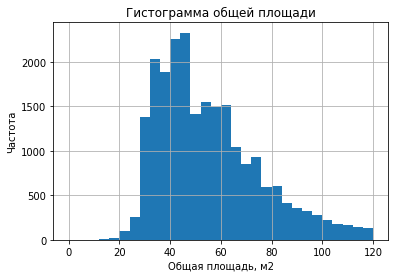

'Выбросы составляют 5.3% от всей выборки'

In [20]:
print(data['total_area'].describe())
print(mustache('total_area'))
data.boxplot(column=['total_area'])
plt.title('Диаграмма размаха для параметра  общая площадь, м2')
plt.ylim(0, 120)
plt.show()
data['total_area'].hist(bins=30, range=(0, 120))
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, м2')
plt.ylabel('Частота')
plt.show()
anomalies('total_area')

count    23565.000000
mean        34.560977
std         22.346131
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64
[2.0, 76.75]


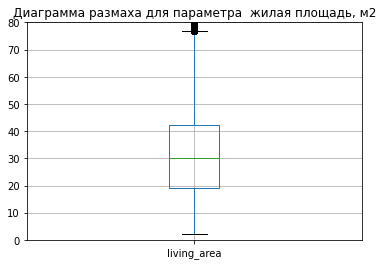

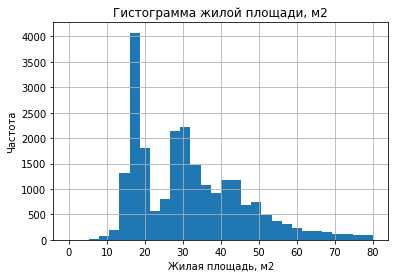

'Выбросы составляют 3.7% от всей выборки'

In [21]:
print(data['living_area'].describe())
print(mustache('living_area'))
data.boxplot(column=['living_area'])
plt.title('Диаграмма размаха для параметра  жилая площадь, м2')
plt.ylim(0, 80)
plt.show()
data['living_area'].hist(bins=30, range=(0, 80))
plt.title('Гистограмма жилой площади, м2')
plt.xlabel('Жилая площадь, м2')
plt.ylabel('Частота')
plt.show()
anomalies('living_area')

count    23565.000000
mean        10.565347
std          6.093133
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
[1.3, 19.5]


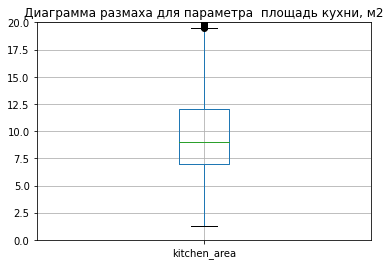

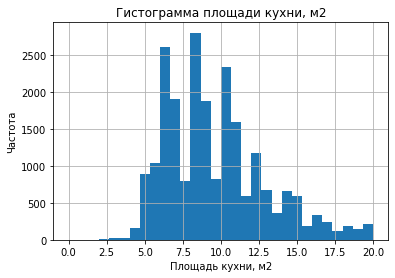

'Выбросы составляют 5.6% от всей выборки'

In [22]:
print(data['kitchen_area'].describe())
print(mustache('kitchen_area'))
data.boxplot(column=['kitchen_area'])
plt.title('Диаграмма размаха для параметра  площадь кухни, м2')
plt.ylim(0, 20)
plt.show()
data['kitchen_area'].hist(bins=30, range=(0, 20))
plt.title('Гистограмма площади кухни, м2')
plt.xlabel('Площадь кухни, м2')
plt.ylabel('Частота')
plt.show()
anomalies('kitchen_area')

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64
[12190.0, 11875000.0]


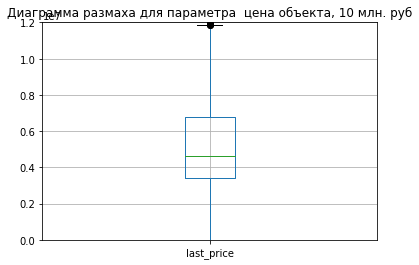

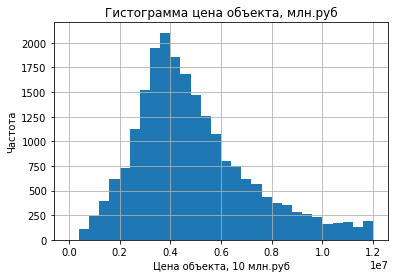

'Выбросы составляют 8.7% от всей выборки'

In [23]:
print(data['last_price'].describe())
print(mustache('last_price'))
data.boxplot(column=['last_price'])
plt.title('Диаграмма размаха для параметра  цена объекта, 10 млн. руб')
plt.ylim(0, 12000000)
plt.show()
data['last_price'].hist(bins=30, range=(0, 12000000))
plt.title('Гистограмма цена объекта, млн.руб')
plt.xlabel('Цена объекта, 10 млн.руб')
plt.ylabel('Частота')
plt.show()
anomalies('last_price')

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
[0.0, 6.0]


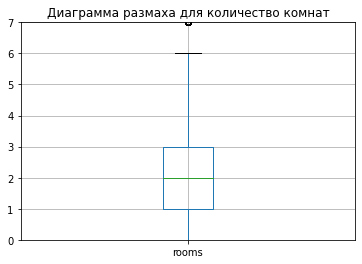

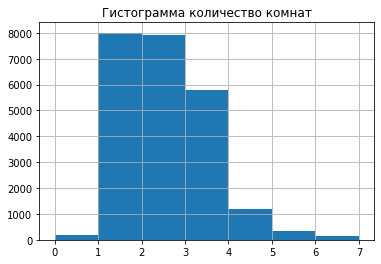

'Выбросы составляют 0.4% от всей выборки'

In [24]:
print(data['rooms'].describe())
print(mustache('rooms'))
plt.ylim(0, 7)
data.boxplot(column=['rooms'])
plt.title('Диаграмма размаха для количество комнат')
plt.show()
data['rooms'].hist(bins=7, range=(0,7))
plt.title('Гистограмма количество комнат')
plt.show()
anomalies('rooms')

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
[2.45, 2.85]


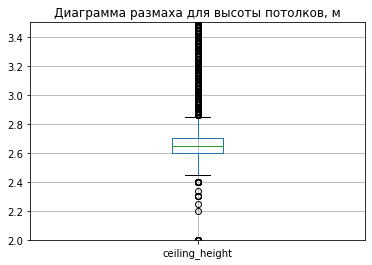

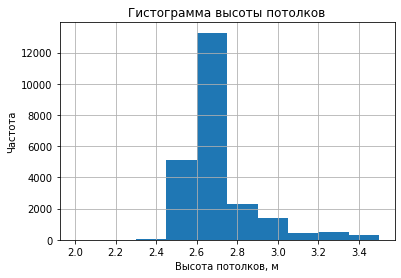

'Выбросы составляют 12.3% от всей выборки'

In [25]:
print(data['ceiling_height'].describe())
print(mustache('ceiling_height'))
data.boxplot(column=['ceiling_height'])
plt.title('Диаграмма размаха для высоты потолков, м')
plt.ylim(2, 3.5)
plt.show()
data['ceiling_height'].hist(bins=10, range=(2,3.5))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.show()
anomalies('ceiling_height')

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64
[1.0, 17.0]


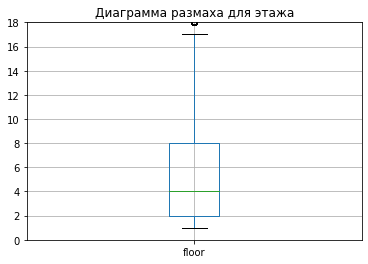

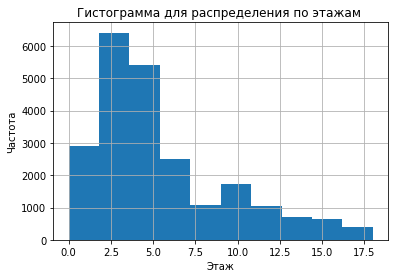

'Выбросы составляют 3.8% от всей выборки'

In [26]:
print(data['floor'].describe())
print(mustache('floor'))
data.boxplot(column=['floor'])
plt.title('Диаграмма размаха для этажа')
plt.ylim(0,18)
plt.show()
data['floor'].hist(bins=10, range=(0,18))
plt.title('Гистограмма для распределения по этажам ')
plt.xlabel('Этаж')
plt.ylabel('Частота')
plt.show()
anomalies('floor')

count      23565
unique         3
top       другой
freq       17326
Name: floor_type, dtype: object


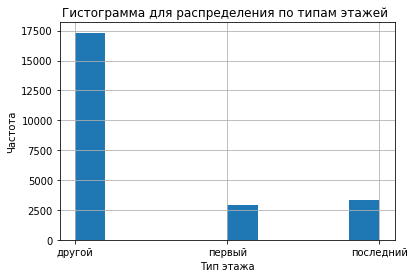

In [27]:
print(data['floor_type'].describe())
data['floor_type'].hist(bins=10)
plt.title('Гистограмма для распределения по типам этажей ')
plt.xlabel('Тип этажа')
plt.ylabel('Частота')
plt.show()

count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64
[1.0, 427.5]


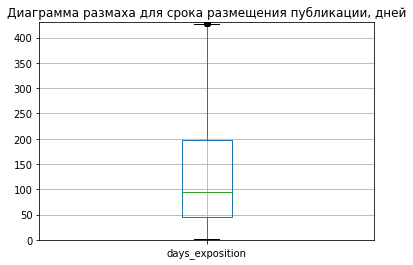

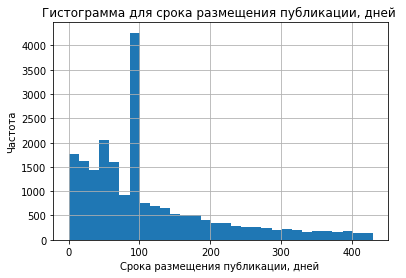

'Выбросы составляют 9.9% от всей выборки'

In [28]:
print(data['days_exposition'].describe())
print(mustache('days_exposition'))
data.boxplot(column=['days_exposition'])
plt.title('Диаграмма размаха для срока размещения публикации, дней')
plt.ylim(0,430)
plt.show()
data['days_exposition'].hist(bins=30, range=(0,430))
plt.title('Гистограмма для срока размещения публикации, дней ')
plt.xlabel('Срока размещения публикации, дней ')
plt.ylabel('Частота')
plt.show()
anomalies('days_exposition')

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64
[181.0, 26855.5]


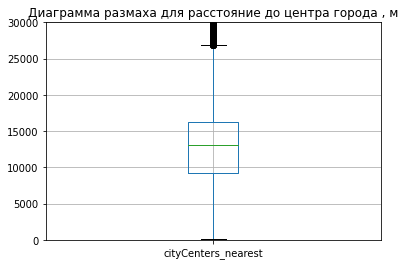

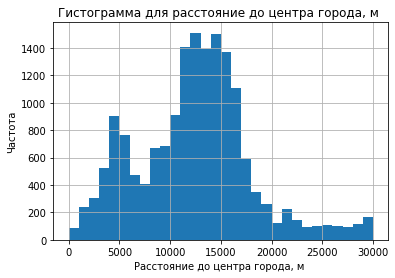

'Выбросы составляют 7.3% от всей выборки'

In [29]:
print(data['cityCenters_nearest'].describe())
print(mustache('cityCenters_nearest'))
data.boxplot(column=['cityCenters_nearest'])
plt.title('Диаграмма размаха для расстояние до центра города , м')
plt.ylim(0,30000)
plt.show()
data['cityCenters_nearest'].hist(bins=30, range=(0,30000))
plt.title('Гистограмма для расстояние до центра города, м ')
plt.xlabel('Расстояние до центра города, м ')
plt.ylabel('Частота')
plt.show()
anomalies('cityCenters_nearest')

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64
[0.0, 65335.0]


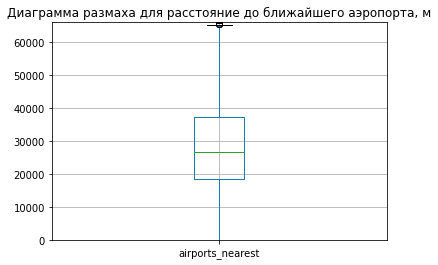

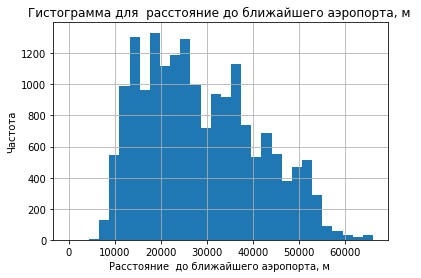

'Выбросы составляют 0.4% от всей выборки'

In [30]:
print(data['airports_nearest'].describe())
print(mustache('airports_nearest'))
data.boxplot(column=['airports_nearest'])
plt.title('Диаграмма размаха для расстояние до ближайшего аэропорта, м')
plt.ylim(0,66000)
plt.show()
data['airports_nearest'].hist(bins=30, range=(0,66000))
plt.title('Гистограмма для  расстояние до ближайшего аэропорта, м ')
plt.xlabel('Расстояние  до ближайшего аэропорта, м ')
plt.ylabel('Частота')
plt.show()
anomalies('airports_nearest')

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64
[1.0, 1098.0]


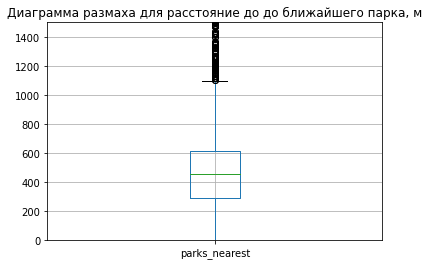

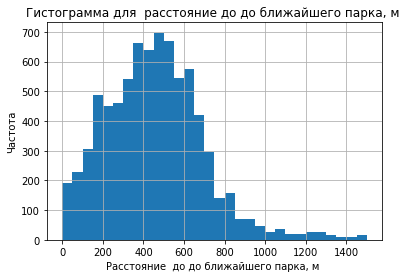

'Выбросы составляют 1.3% от всей выборки'

In [31]:
print(data['parks_nearest'].describe())
print(mustache('parks_nearest'))
data.boxplot(column=['parks_nearest'])
plt.title('Диаграмма размаха для расстояние до до ближайшего парка, м')
plt.ylim(0,1500)
plt.show()
data['parks_nearest'].hist(bins=30, range=(0,1500))
plt.title('Гистограмма для  расстояние до до ближайшего парка, м ')
plt.xlabel('Расстояние  до до ближайшего парка, м ')
plt.ylabel('Частота')
plt.show()
anomalies('parks_nearest')

count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64
[0.0, 6.0]


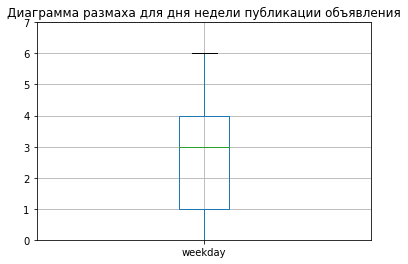

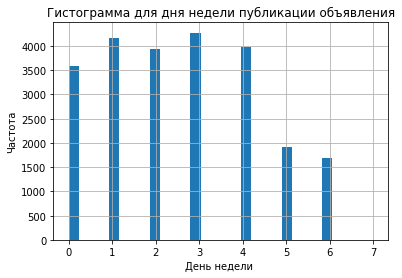

In [32]:
print(data['weekday'].describe())
print(mustache('weekday'))
data.boxplot(column=['weekday'])
plt.title('Диаграмма размаха для дня недели публикации объявления')
plt.ylim(0,7)
plt.show()
data['weekday'].hist(bins=30, range=(0,7))
plt.title('Гистограмма для дня недели публикации объявления')
plt.xlabel('День недели ')
plt.ylabel('Частота')
plt.show()

count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64
[1.0, 12.0]


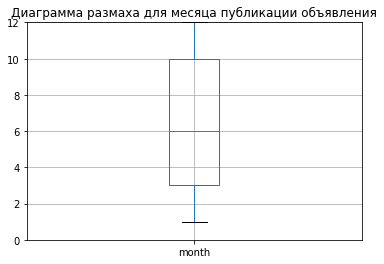

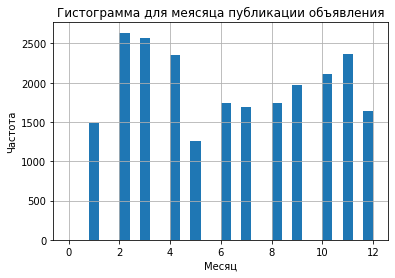

In [33]:
print(data['month'].describe())
print(mustache('month'))
data.boxplot(column=['month'])
plt.title('Диаграмма размаха для месяца публикации объявления')
plt.ylim(0,12)
plt.show()
data['month'].hist(bins=30, range=(0,12))
plt.title('Гистограмма для меясяца публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Частота')
plt.show()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### Выводы:
1. Типичная квартира высталенная на продажу - это 2-комнатная квартира площадью 52 кв. м, жилая площадь 30 кв. м, кухня 9 кв.м, с потолками 2,65 м, проданная за 3 месяца (95 дней) по цене 4,7 млн рублей, расстояние до центра города  13 км, расстояние до ближайшего аэропорта  27 км.
2. Аномальные характеристики квартир из датасета - это кватриры площадью более 115 кв. м. с числом комнат более 7, по цене  более 11.9 млн.руб с высотой  потолков  менее 2,45 м. и более 2,85 м. Срок продажи более 427 дней.
3. В среднем продажа квартиры  занимает  95 дней. При этом четверть всех квартир продается  в течение 45 дней с момента публикации, 75 процетров квартир продаются в течение 198 дней.  Если объект был продан после 427 дней с момента публикации, это говорит об аномально долгой продаже.

Ранее мы создали фунцию рассчитывающую размеры "усов" для диаграммы размаха. Используя эту функцию исключим аномальные 
значения для  параметров total_area, rooms, living_area, kitchen_area, last_price.

In [35]:
#Создадим новые колонки, содержащие нормальные данные без выбросов 
data['total_area_good'] = data['total_area'] < mustache('total_area')[1]
data['rooms_good'] = data['rooms'] < mustache('rooms')[1]
data['living_area_good'] = data['living_area'] < mustache('living_area')[1]
data['kitchen_area_good'] = data['kitchen_area'] < mustache('kitchen_area')[1]
data['last_price_good'] = data['last_price'] < mustache('last_price')[1]
# Новая таблица для проведения аннализа
good_data = data[(data['total_area_good'] == True) & 
     (data['rooms_good'] == True) &
     (data['living_area_good'] == True) &
     (data['kitchen_area_good'] == True) &
     (data['last_price_good'] == True)].reset_index(drop=True)
good_data_stat = good_data.loc[:, ['total_area', 'last_price', 'rooms', 'living_area','kitchen_area']]
print(good_data_stat)
# Посмотрим на коэффициент корреляции
print(good_data_stat.corr())




       total_area  last_price  rooms  living_area  kitchen_area
0            40.4   3350000.0      1         18.6          11.0
1            56.0   5196000.0      2         34.3           8.3
2            30.4   2890000.0      1         14.4           9.1
3            37.3   3700000.0      1         10.6          14.4
4            71.6   7915000.0      2         40.5          18.9
...           ...         ...    ...          ...           ...
20853        30.0   1350000.0      1         17.5           6.0
20854        62.4   4600000.0      3         40.0           8.0
20855        59.0   3100000.0      3         38.0           8.5
20856        56.7   2500000.0      2         29.7          10.6
20857        32.3   1350000.0      1         12.3           9.0

[20858 rows x 5 columns]
              total_area  last_price     rooms  living_area  kitchen_area
total_area      1.000000    0.688301  0.809502     0.919994      0.478546
last_price      0.688301    1.000000  0.432010     0.57414

Создадим матрицу диаграмм для изучения взаимосвяхи  параметров.

array([[<AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='living_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='rooms'>],
       [<AxesSubplot:xlabel='total_area', ylabel='living_area'>,
   

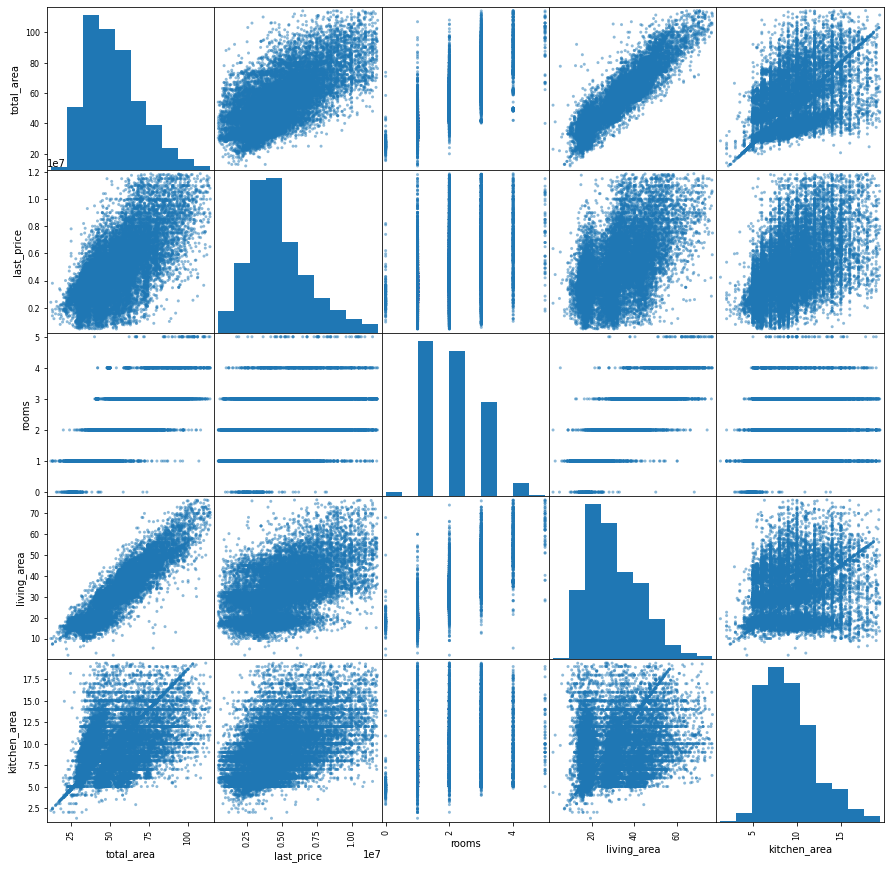

In [36]:
pd.plotting.scatter_matrix(good_data_stat,figsize=(15, 15))

Определим зависимость от типа этажа.

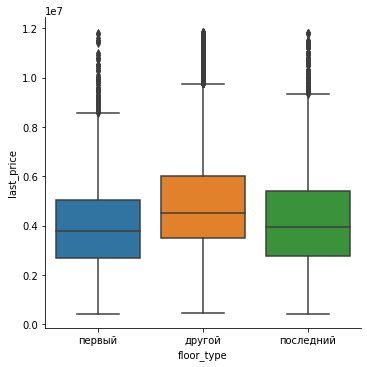

In [37]:
sns.catplot(x="floor_type", y="last_price", kind="box", data=good_data)

Зависимость от дня недели, месяца и года.

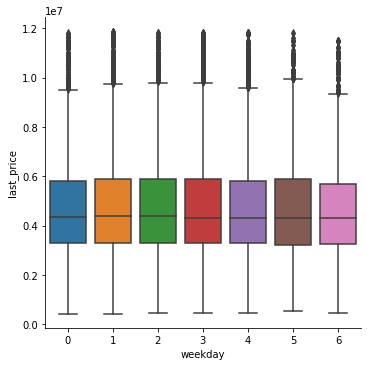

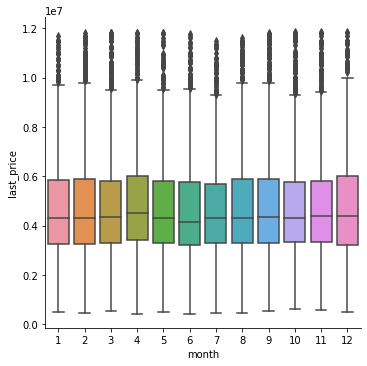

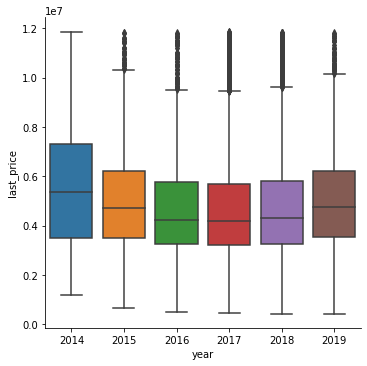

In [38]:
for column in ['weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=good_data)

Мы видим,  что наиболее сильная корреляция наблюдается между общей площадью квартиры и ее стоимостью (коэфф. корреляции 0,69).
Стоимость квартиры также зависит от числа комнат: чем их больше, тем квартира дороже (коэфф. корреляции 0,43).
Наблюдается зависимоть стоимоcти квартиры от жилой площади и площади кухни. Коэффициенты  коррреляции 0,57 и 0,5 соответсвенно.
Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.
День недели и месяц публикации объявления,практически, не играют  роли на стоимость, однако в  декабре прослеживается
больший разброс стоимости квартир. 
Квартиры продавались по более высоким ценам в 2014 году, до 2017 года было уменьшение стоимости и стабилизация цен, с 2018 года наблюдается рост цен.

Посчитаем среднюю цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [39]:
#Создадим сводную таблицу
data_locality_name = good_data.pivot_table(index='locality_name', values='price_per_m2', aggfunc=['count', 'median'])
data_locality_name.columns = ['count', 'median']
#Отсортируем  данные по кол-ву объявлений в порядке уьывания и выведем первые 10 строк
data_locality_name.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
санкт-петербург,13193,101923.10
посeлок мурино,515,85714.30
посeлок шушары,431,76829.30
всеволожск,385,65540.50
колпино,331,74722.20
пушкин,326,98045.55
посeлок парголово,321,91917.60
гатчина,300,67671.55
деревня кудрово,283,92297.90


Самый дорогой квадратный метр  и больше всего предложений в Санкт-Петербурге, а самый дешевый и меньше всего предложений в Выборге.

Выделим квартиры в Санкт-Петербурге  и вычислим среднюю цену  для каждого километра  от центра города.

<AxesSubplot:xlabel='city_centers_km'>

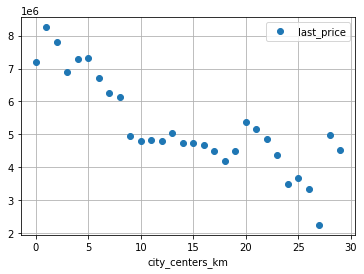

In [40]:
data_spb = good_data.loc[(good_data['locality_name'] == 'санкт-петербург')]
# Сводная таблица
spb_center_m2 = data_spb.pivot_table(index='city_centers_km', values='last_price', aggfunc='median')
# Визуализируем данные
spb_center_m2.plot(style='o', grid = True)

Мы видим, что на расстоянии ~ 8 км  от центра города происходит резкий спад  средней  стоимости квартиры, 
спад сосотавляет  ~ 1000000 руб.

### Общий вывод
Рыночная стоимость объекта недвижимости определяеятся:
1. Общей площадью квартиры. Аномальные характеристики квартир - это кватриры площадью более 115 кв. м.
2. Расстоянием до центра города.Чем дальше от центра города, тем в среднем квартира будет стоить дешевле: в среднем разница в    стоимости между первым и восьмым километром от центра может достигать 2 млн руб.На расстоянии  8 км от центра города происходит резкий спад средней стоимости квартиры.
3. Числом комнат, жилой площадью и площадью кухни. Коэффициенты коррреляции 0.43, 0.57 и 0.5 соответсвенно
4. Первые  и последний этажи стоят дешевле
5. Средний срок продажи квартиры 3 месяца (95 дней), слишком долгая продажа — более 14 месяцев (428 дней)).